In [1]:
from pup.unfolder import PhononUnfolder
from pup.plotting import UnfolderPlotting
from pup.unfolder import * 
import matplotlib.pyplot as plt

In [2]:
directories = {'defect_directory':'../example/li3ocl/v_Li/defect/',
                     'host_directory':'../example/li3ocl/v_Li/host',
                    'defect_index':74}

In [3]:
kpaths = {'G-M':[[0.0,0.0,0.0],[0.5,0.5,0.0]],
          'M-R':[[0.5,0.5,0.0],[0.5,0.5,0.5]],
          'R-X':[[0.5,0.5,0.5],[0.0,0.5,0.0]],
          'X-G':[[0.0,0.5,0.0],[0.0,0.0,0.0]],
          'G-R':[[0.0,0.0,0.0],[0.5,0.5,0.5]]}

new:

In [4]:
import pickle
try:
    %time data = pickle.load(open('test.p','rb'))
except:
    p = PhononUnfolder(directories,[3,3,3],**{'tqdm_disable':True})
    data = p.run_all_new(kpaths=kpaths,line_density=100,eigendisplacement_atom='Li')
    pickle.dump(data,open('test.p','wb'))

CPU times: user 129 ms, sys: 5.07 s, total: 5.19 s
Wall time: 6.03 s


old:

In [5]:
#from tqdm.notebook import tqdm 
#data = {}
#p = PhononUnfolder(directories,[3,3,3],**{'tqdm_disable':True})
#for kpath in tqdm(kpaths):
#    data[kpath] = p.run_all(kpath=kpaths[kpath],line_density=50,eigendisplacement_atom='Li')

In [264]:
    def single_plot_with_weight(ax,threshold,s,primitive_bs=False,primitive_color='tab:blue'):
        ax = ax
        labels = []
        lines = []
        maxpq = None
        for i,path in enumerate(data['data']):
            if i == 0:
                labels.append(data['data'][path]['prim_data']['label'])
                lines.append(data['data'][path]['prim_data']['line'])
                pq = data['data'][path]['prim_data']['q']
                maxpq = np.max(pq)
                
                uf = data['data'][path]['unfolded_data']['f']
                wts = data['data'][path]['unfolded_data']['w']
                eigendisp = data['data'][path]['eigendisplacements']
                max_disp = np.max(eigendisp) 
                
                norm = Normalize(vmin=0.0,vmax=np.max(wts)) # this probably needs to be combined over the plot
        
                qpts = [[q for x in range(len(uf[0]))] for q in pq]
                col = [[mcolors.to_rgba([eigendisp[1][w1][w2]/max_disp,0.0,0.0],alpha=wts[w1][w2]*threshold)
                        for w2 in range(len(wts[w1]))] 
                       for w1 in range(len(wts))]            
        
                for j,q in enumerate(qpts):
                    ax.scatter(q,uf[j],c=col[j],s=s,edgecolor=None,linewidths=0,norm=norm)
                
            else:
                labels.append(data['data'][path]['prim_data']['label'])
                lines.append(data['data'][path]['prim_data']['line'])
                pq = data['data'][path]['prim_data']['q']+maxpq
                maxpq = np.max(pq)
                
                uf = data['data'][path]['unfolded_data']['f']
                wts = data['data'][path]['unfolded_data']['w']
                eigendisp = data['data'][path]['eigendisplacements']
                max_disp = np.max(eigendisp) 
                
                norm = Normalize(vmin=0.0,vmax=np.max(wts)) # this probably needs to be combined over the whole plot
        
                qpts = [[q for x in range(len(uf[0]))] for q in pq]
                col = [[mcolors.to_rgba([eigendisp[1][w1][w2]/max_disp,0.0,0.0],alpha=wts[w1][w2]*threshold)
                        for w2 in range(len(wts[w1]))] 
                       for w1 in range(len(wts))]            
        
                for j,q in enumerate(qpts):
                    ax.scatter(q,uf[j],c=col[j],s=s,edgecolor=None,linewidths=0,norm=norm)

         
        
        if primitive_bs == True:
            distances  = data['prim']['distances'] 
            frequencies = data['prim']['frequencies']
            connections = data['prim']['connections']
            scale = maxpq / np.max(distances)
            
            for i, (d,f,c) in enumerate(zip(distances,frequencies,connections)):
                if i == 0:
                    ax.plot(d*scale,f,color=primitive_color,label='bulk',zorder=0,alpha=0.5)
                else:
                    ax.plot(d*scale,f,color=primitive_color,label='bulk',zorder=0,alpha=0.5)
        
        labels = list(it.chain(*labels))
        labels = [x for i,x in enumerate(labels) if not labels[i-1] == x]
        formatted_labels = ['$\\Gamma$' if x == 'G' else x for x in labels]  
        lines = list(dict.fromkeys(np.cumsum(lines)))
        
        ax.set_xlim(0,maxpq)
        ax.set_xticks(lines)
        ax.set_xticklabels(formatted_labels)
        vline = [ax.axvline(x,color='k') for x in lines[1:-1]]

In [6]:
pl = UnfolderPlotting(data)

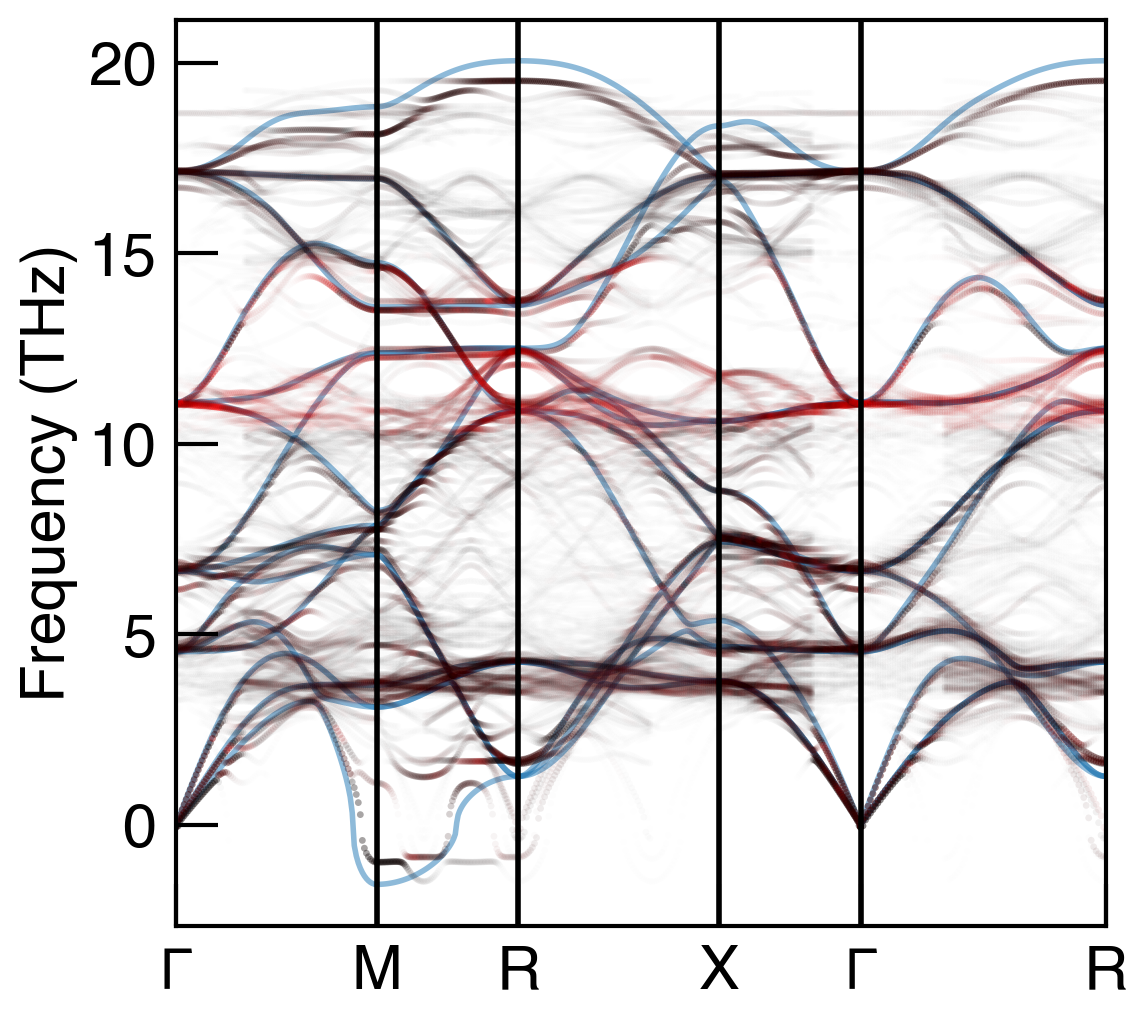

In [7]:
from sumo.plotting import sumo_base_style
plt.style.use(sumo_base_style)
fig,ax = plt.subplots(figsize=(6,6),dpi=200)
pl.single_plot_with_weight(threshold=0.5,s=6,ax=ax,primitive_color='tab:blue',primitive_bs=True)
ax.set_ylabel('Frequency (THz)')
plt.savefig('../unfolded.png')